# Introdução

Olá, bem vindo ao exemplo 3! Este exemplo será uma boa maneira de aprender a pensar como tratar de dados muito grandes. Esse dadataset pode parecer assustador pois tem 81 colunas. Mas com algumas dicas que darei nesse módulo, poderá facilitar o processo de análise.

Lembre-se que para uma boa análise é necessário paciencia, e em grande parte dos casos vai ser demorado mesmo, mas não é dificíl.

No dataset `house_prices.csv` temos dados de casa vendidas como número de quartos, banheiro, etc. E queremos prever o preço de uma casa nova, dada as características dela.

# Analisando

Vamos começar visualizando os dados.

In [111]:
import pandas as pd

df = pd.read_csv('house_prices.csv')

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
df.shape

(1460, 81)

Wow, muito grande não é mesmo? Não se desespere, aqui vamos aprender a fazer um filtro do que é mais importante analisar primeiro.

In [113]:
# Mostrando colunas
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Nós cientistas de dados temos que ter o que chamo de intuição. A gente "sente" que alguma coluna é mais importante para o nosso modelo e então a gente analisa.

- 'SalesPrice' é a mais importante sem dúvida, nosso objetivo gira em torno dela. O próximo passo é descobrir as colunas que mais afetam essa variável.

- 'OverallQual' mede o rating da casa em termos materiais. Pode ser importante.

- 'OverallCond' mede as condições da casa.

- 'YearBuilt' mede o ano de contrução.

Ok, agora que temos um objetivo vamos analisar se estamos corretos:



In [114]:
#importando bibliotecas gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#numpy
import numpy as np

### OverallQual

Visualizando relação:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

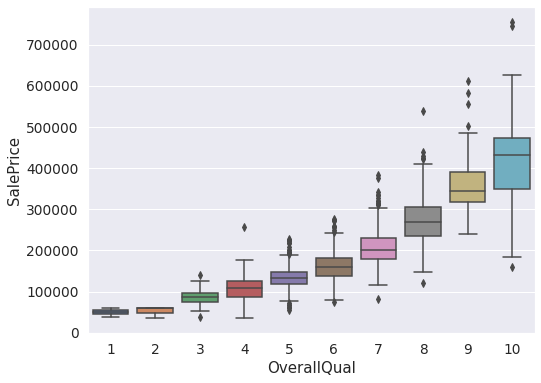

In [115]:
plt.figure(figsize= (8,6))
sns.boxplot(x= 'OverallQual', y= 'SalePrice', data= df)

Vemos umas relação `linear` entre 'OverallQual' e 'SalePrice'

### OverallCond

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

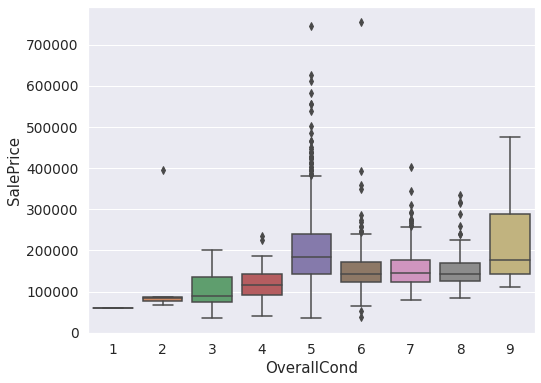

In [116]:
plt.figure(figsize= (8,6))
sns.boxplot(x= 'OverallCond', y= 'SalePrice', data= df)

Não há uma relação muito clara entre `OverallCond` e `Saleprice`.

### YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

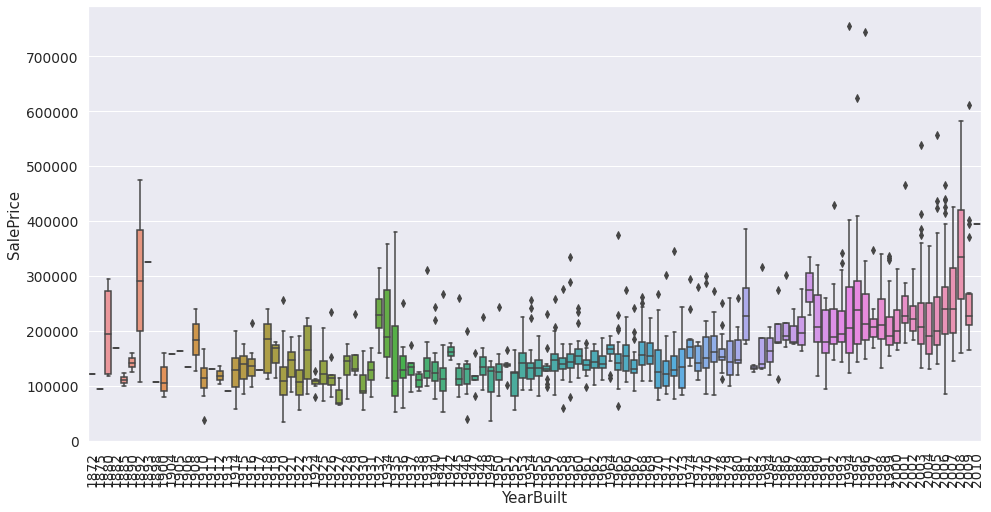

In [117]:
plt.figure(figsize= (16,8))
plt.xticks(rotation= 90)
sns.boxplot(x= 'YearBuilt', y= 'SalePrice', data= df)


Não há uma relação clara entre o ano de compra e o preço.

## Mapa de calor

Podemos ver que a intuição nem sempre dá certo, e há um jeito melhor de ver os que tem uma boa relação, através de um mapa de calor.

<AxesSubplot:>

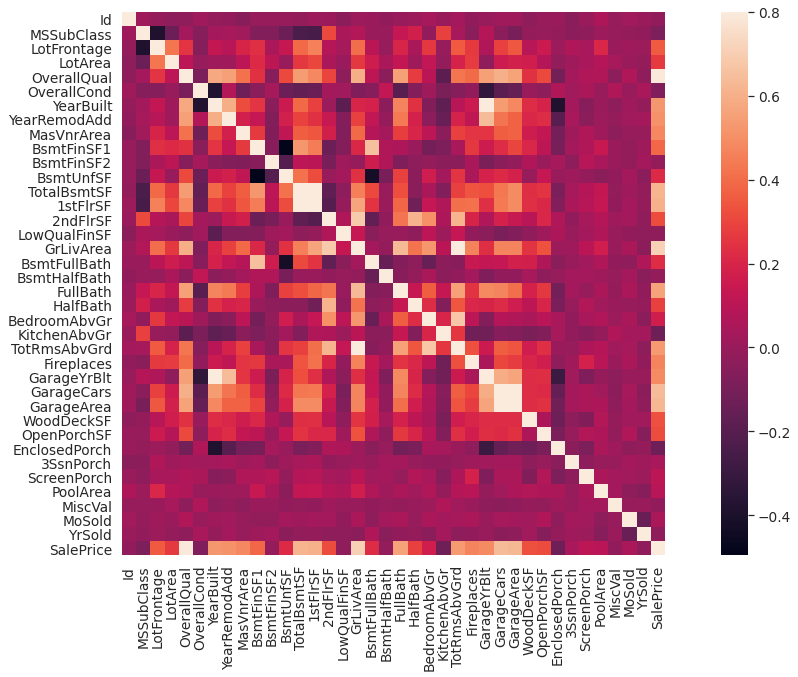

In [118]:
corrmat = df.corr()

plt.figure(figsize= (20,10))
sns.heatmap(corrmat, vmax= .8, square=True)

Há um jeito de ver as colunas que mais se relacionam com `SalePrice` mais de perto:


<AxesSubplot:>

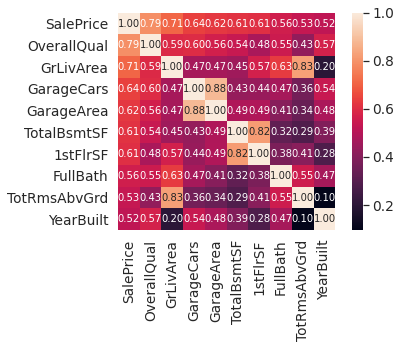

In [119]:
colunas = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[colunas].values.T)
sns.set(font_scale= 1.25)
sns.heatmap(cm, cbar= True, annot= True, square= True, fmt= '.2f', annot_kws={'size' : 10}, yticklabels= colunas.values, xticklabels= colunas.values)

## Valores Faltantes (NaN)

Para eliminar os valores faltantes nesse dataset precisamos analisar se eles vão ser impactantes no resultado final. Vamos dar uma olhada:

In [120]:
total = df.isnull().sum().sort_values(ascending= False)
porcentagem = (df.isnull().sum()/df.isnull().count()).sort_values(ascending= False)

nulos = pd.concat([total, porcentagem],axis= 1, keys= ['Total', 'Porcentagem'])
nulos.head(20)

,Total,Porcentagem
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Vamos dropar (eliminar) as colunas que contém valores nulos.

In [121]:
df = df.drop((nulos[nulos['Total'] > 0]).index, 1)
df.isnull().sum().max()

0

## Treinamento
 Com os dados analisados e limpos podemos fazer o treinamento:

### Transformando valores numéricos em categóricos

In [122]:
#Importando LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [123]:
#tranformando colunas categórica em numéticas
for coluna in df.columns:
    if df[coluna].dtypes == object: # Verifica se acoluna é categorica
        df[coluna] = LabelEncoder().fit_transform(df[coluna])

#verificando tipos das colunas        
df.dtypes.value_counts()

int64    62
dtype: int64

### Separando treino e teste

In [124]:
#importando funçaõ de separação de treino e teste
from sklearn.model_selection import train_test_split

X = df.iloc[:, : 61].values
y = df.iloc[:, 61].values

X_treino_lista, X_teste_lista, y_treino_lista, y_teste_lista = [], [], [], []
rep = 10
for i in range(rep):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state= i)

    X_treino_lista.append(X_treino)
    X_teste_lista.append(X_teste)
    y_treino_lista.append(y_treino)
    y_teste_lista.append(y_teste)


## Regressão Linear

Vamos criar um modelo baseado no algorítmo de LinearRegression que é um dos mais conhecidos algoritmos de regressão.

In [125]:
# Importando LinearRegression
from sklearn.linear_model import LinearRegression

Assim como nos outros Exemplos faremos uma média das accuracias:

In [126]:
from sklearn.metrics import r2_score

lr = LinearRegression()

accs = []
for i in range(rep):
    #treinando
    lr.fit(X_treino_lista[i], y_treino_lista[i])
    #prevendo
    p = lr.predict(X_teste_lista[i])

    # Teste de acuracia
    accs.append(r2_score(p, y_teste_lista[i]))

acc_mean = np.mean(accs)

In [127]:
#mostrando accuracia
print(acc_mean)


0.7440614322094221
